# Facial Expression-Based Emotion Recognition

## Environment Preparation

### Package Importing

In [1]:
# Basic imports
import os
import sys
import warnings
from dotenv import load_dotenv
# Data manipulation and numerical processing libraries
import numpy as np
import pandas as pd
from functools import partial

# Machine learning and evaluation tools
import psychai.facial_expression.feature_extraction.feature_extraction

import psychai.facial_expression

import psychai.facial_expression.feature_extraction

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Custom feature extraction modules from psychai (assuming psychai is installed in your environment)
import psychai.feature.feature_extraction.feature_retriever
import psychai.feature.feature_extraction.feature_processor

# Initialize feature processor from psychai
feature_processor = psychai.feature.feature_extraction.feature_processor.FeatureProcessor()

from datetime import datetime

today = datetime.now().strftime('%Y%m%d')

# Set base directories and file paths

load_dotenv(override=True)
huggingface_cache_location = os.getenv("huggingface_cache_location")
datasets_cache_location = os.getenv("datasets_cache_location")
resutls_location = os.getenv("results_location")
resource_path= os.getenv("resources_location")
resources_location_external= os.getenv("resources_location_external")

raw_data_path =  os.path.join(resource_path, "examples", "paper5_mmer_moral","resources","raw_data")
csv_cache_file_path =  os.path.join(resutls_location, "examples", "paper5_mmer_moral", "facial",f"facial_features_cache_{today}.csv")
csv_cache_baseline_file_path =  os.path.join(resutls_location, "examples", "paper5_mmer_moral", "facial",f"facial_features_baseline_cache_{today}.csv")
pickle_file_path =  os.path.join(resutls_location, "examples", "paper5_mmer_moral", "facial",f"facial_features_cache_{today}.pkl")
pickle_baseline_file_path =  os.path.join(resutls_location, "examples", "paper5_mmer_moral", "facial",f"facial_features_baseline_cache_{today}.pkl")
pickle_folder_path =  os.path.join(resutls_location, "examples", "paper5_mmer_moral", "facial")

folder_path = os.path.join(resource_path, "examples", "paper5_mmer_moral","resources","raw_data","005","RecordedVideo")
#folder_path = "/mnt/c/Working/Programming/Python/resources/wsl2/examples/paper5_mmer_moral/resources/raw_data/005/RecordedVideo/"

# Extend system path to current directory (for importing modules if needed)
current_dir = os.path.abspath('../')
sys.path.append(current_dir)

# Import any custom utilities from the parent directory if needed
import local_utilities

# Specify modality (e.g., audio segment type) for processing
modality_value = "Facial_Expression"

# Import the `Image` class from the `IPython.display` module to display images directly in Jupyter notebooks or IPython environments.
# This will allow images (e.g., facial expressions) to be shown inline for easier visualization and analysis.
from IPython.display import Image

# Import custom utility functions or classes from a local module called `local_utilities`. 
import local_utilities

features_extractor = psychai.facial_expression.feature_extraction.feature_extraction.FacialExpresionFeatureExtractor(
    landmark_model="mobilefacenet",
    au_model='xgb',
    emotion_model="resmasknet",
    identity_model="facenet",
    device="cuda",
)

## Single Image Example

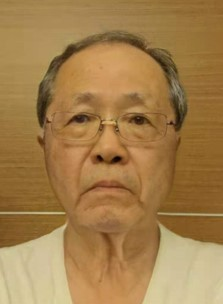

In [3]:
single_image_path =  os.path.join(resource_path, "examples", "paper5_mmer_moral", "resources","images","face_example.jpg")
Image(filename=single_image_path, width=200) 

100%|██████████| 1/1 [00:04<00:00,  4.20s/it]


array([[ 26.        ,  37.        , 161.        , ...,  14.59127617,
         29.14346504,  14.83477592]])

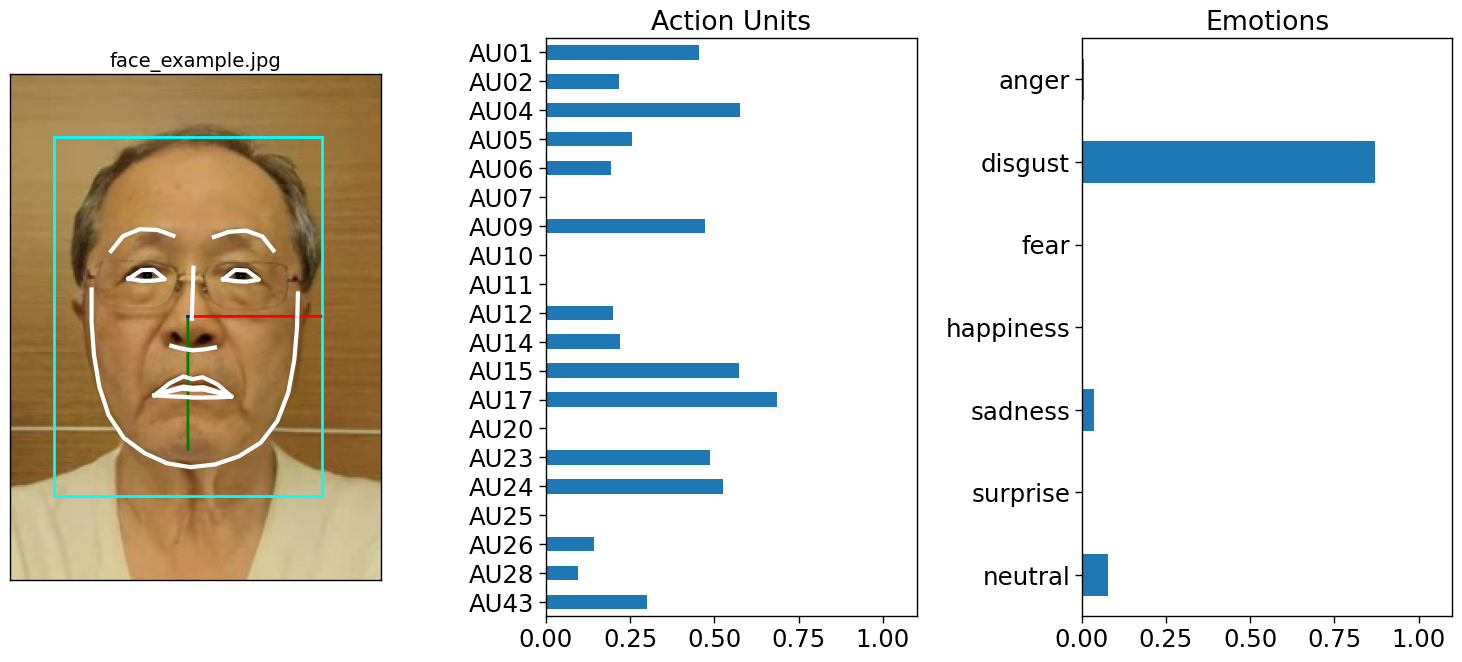

In [4]:
features, feature_names = features_extractor.process_image(single_image_path, show_frame_images=True, add_distance=True)
features

## Single Video Example

In [5]:
files = os.listdir(folder_path)
files[0]
single_video_path = os.path.join(folder_path,files[0])
df_features = features_extractor.process_video(file_path=single_video_path, sampling_time=240, show_frame_images= False)
df_features

skip frames 7200/12068
Processing video with 12068 frames at 30 FPS. Skip 7200 frames for sampling.


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


Extracted features for 2 frames.


,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,distance_63_64,distance_63_65,distance_63_66,distance_63_67,distance_64_65,distance_64_66,distance_64_67,distance_65_66,distance_65_67,distance_66_67
0,355.0,38.0,355.0,443.0,0.999199,405.603088,409.462219,416.472900,426.484375,442.679535,...,10.924808,86.921295,87.453064,89.098427,85.325607,89.643669,94.616714,30.374569,59.271393,29.595575
1,391.0,85.0,331.0,404.0,0.998805,434.168274,436.630737,442.302887,452.123077,468.167023,...,9.859156,81.555893,76.367523,71.431747,78.064743,76.555107,75.031570,29.769764,55.379604,26.601242


## Target Folder Processing

In [15]:
single_analysis = local_utilities.SingleModalityAnalysis()
raw_data_path = r'/mnt/f/Backup/Experiments/Temp_Location'
filters = [(2, '23')]
user_ids = range(1, 120)
participant_data_path =  os.path.join(resource_path, "examples", "paper5_mmer_moral", "resources","data","rct","rct.csv")
merging_pdf = pd.read_csv(participant_data_path)
df_largest = single_analysis.prosss_folder(raw_data_path, filters, user_ids, merging_pdf, modality_value="RecordedVideo")

RecordedVideo folder not found for user 010
RecordedVideo folder not found for user 025
RecordedVideo folder not found for user 026
RecordedVideo folder not found for user 027
RecordedVideo folder not found for user 042
RecordedVideo folder not found for user 059
RecordedVideo folder not found for user 071
RecordedVideo folder not found for user 074
RecordedVideo folder not found for user 076
RecordedVideo folder not found for user 077
RecordedVideo folder not found for user 088
RecordedVideo folder not found for user 091
RecordedVideo folder not found for user 112
RecordedVideo folder not found for user 116
RecordedVideo folder not found for user 118
RecordedVideo folder not found for user 119
Total matching files found: 134
     user_id       modality  attribute_index attribute_value  \
0          1  RecordedVideo                2              23   
1          2  RecordedVideo                2              23   
2          3  RecordedVideo                2              23   
3       

My labtop takes about 30 seconds for one frame.
So if we take one frame per 5 seconds, than a 10 minutes video takes about 60 minutes to complete.
With parallel processing, it actually took 7 and half minitues to complete a 10 minutes video and
48 minutes to run 7 videos.


In [16]:
pickle_file_path = r'/mnt/c/Working/Programming/Python/results/wsl2/examples/paper5_mmer_moral/facial/facial_features_cache_20241220.pkl'
csv_cache_file_path = r'/mnt/c/Working/Programming/Python/results/wsl2/examples/paper5_mmer_moral/facial/facial_features_cache_20241220.csv'

In [17]:
sampling_time_in_sec = 5
processor = psychai.feature.feature_extraction.feature_retriever.FeatureRetriever(df_largest, feature_extractors=[partial(features_extractor.process_video, sampling_time=sampling_time_in_sec, show_frame_images = False)]
                             ,cache_file_path=pickle_file_path)

# Extract features and return the final DataFrame
df_with_features = processor.extract_features(override= False)

Loading from cache...
Processing 33 new items out of 101 total items.


Extracting features:   0%|          | 0/33 [00:00<?, ?it/s]

skip frames 150/22501
skip frames 150/14867
skip frames 150/22506
skip frames 150/15779
skip frames 150/5134
skip frames 150/14933
skip frames 150/5107
skip frames 150/17525
skip frames 150/22405
skip frames 150/5278
skip frames 150/5157
skip frames 150/17515
skip frames 150/5179
skip frames 150/15269
Processing video with 22501 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 14867 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 22506 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 15779 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 5134 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 14933 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 5107 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 17525 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 22405 frames at 30 FPS. Skip 150 frames for sampling.
Processing vide




























































































  0%|          | 0/1 [00:00<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s]




  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

























  0%|          | 0/1 [00:00<?, ?it/s]


skip frames 150/15583
skip frames 150/5130
skip frames 150/22235































































































  0%|          | 0/1 [00:00<?, ?it/s]


skip frames 150/17559
skip frames 150/15680
skip frames 150/5161
skip frames 150/22435
skip frames 150/22375
Processing video with 5130 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 22235 frames at 30 FPS. Skip 150 frames for sampling.
skip frames 150/22581
skip frames 150/5355
Processing video with 15680 frames at 30 FPS. Skip 150 frames for sampling.
skip frames 150/22538
skip frames 150/5151
Processing video with 17559 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 22581 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 5355 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 22375 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 15583 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 5161 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 22538 frames at 30 FPS. Skip 150 frames for sampling.
Processing video with 22435 frames at 30 FPS. Sk


















  0%|          | 0/1 [00:00<?, ?it/s]

















































































  0%|          | 0/1 [00:00<?, ?it/s][A



















Exception ignored in: <generator object tqdm.__iter__ at 0x7fe8f094daf0>
Traceback (most recent call last):
  File "/home/ivan/miniconda3/envs/env41204/lib/python3.10/site-packages/tqdm/std.py", line 1196, in __iter__

































    self.close()
  File "/home/ivan/miniconda3/envs/env41204/lib/python3.10/site-packages/tqdm/std.py", line 1275, in close
    self._decr_instances(self)
  File "/home/ivan/miniconda3/envs/env41204/lib/python3.10/site-packages/tqdm/std.py", line 713, in _decr_instances
    inst.clear(nolock=True)
  File "/home/ivan/miniconda3/envs/env41204/lib/python3.10/site-packages/tqdm/std.py", line 1319, in clear
    self.sp('')
AttributeError: 'tqdm' object has no attribute 'sp'



















  0%|          | 0/1 [00:00<?, ?it/s]

























Error processing item /mnt/f/Backup/Experiments/Temp_Location/080/RecordedVideo/PS-9_080_23_06_10_09_55_55.mp4: 'tqdm' object has no attribute 'sp'


skip frames 150/17621
Processing video with 17621 frames at 30 FPS. Skip 150 frames for sampling.






























  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:56<00:00, 116.48s/it]










100%|██████████| 1/1 [01:37<00:00, 97.10s/it]





































  0%|          | 0/1 [00:00<?, ?it/s][A





100%|██████████| 1/1 [01:54<00:00, 114.61s/it]





































  0%|          | 0/1 [00:00<?, ?it/s][A


100%|██████████| 1/1 [01:09<00:00, 69.10s/it]






100%|██████████| 1/1 [00:57<00:00, 57.79s/it]



100%|██████████| 1/1 [01:08<00:00, 68.59s/it]





































  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [01:08<00:00, 68.50s/it]












100%|██████████| 1/1 [00:49<00:00, 49.37s/it]







100%|██████████| 1/1 [01:05<00:00, 65.89s/it]














100%|██████████| 1/1 [00:59<00:00, 59.29s/it]








100%|██████████| 1/1 [01:00<00:00, 60.58s/it]















100%|██████████| 1/1 [01:03<00:00, 63.74s/it]













100%|██████████| 1/1 [01:06<00:00, 66.49s/it

Extracted features for 35 frames.
skip frames 150/5408
Processing video with 5408 frames at 30 FPS. Skip 150 frames for sampling.





  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [01:09<00:00, 69.00s/it]
















100%|██████████| 1/1 [01:10<00:00, 70.83s/it]





  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [01:14<00:00, 74.48s/it]








100%|██████████| 1/1 [01:18<00:00, 78.49s/it]










100%|██████████| 1/1 [01:18<00:00, 78.98s/it]


































  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]



















  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [01:13<00:00, 73.75s/it]






100%|██████████| 1/1 [01:29<00:00, 89.87s/it]





100%|██████████| 1/1 [01:23<00:00, 83.28s/it]











100%|██████████| 1/1 [01:19<00:00, 79.95s/it]











  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [01:13<00:00, 73.21s/it]








































  0%|          | 0/1 [00:00<?, ?it/s]












Extracted features for 35 frames.


100%|██████████| 1/1 [01:27<00:00, 87.07s/it]


skip frames 150/15610
Processing video with 15610 frames at 30 FPS. Skip 150 frames for sampling.















  0%|          | 0/1 [00:00<?, ?it/s]







































































  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:05<00:00, 65.04s/it]















100%|██████████| 1/1 [01:11<00:00, 71.31s/it]












100%|██████████| 1/1 [01:30<00:00, 90.49s/it]















  0%|          | 0/1 [00:00<?, ?it/s][A














100%|██████████| 1/1 [01:21<00:00, 81.67s/it]

























  0%|          | 0/1 [00:00<?, ?it/s][A












100%|██████████| 1/1 [01:35<00:00, 95.49s/it]



100%|██████████| 1/1 [01:17<00:00, 77.28s/it]
















100%|██████████| 1/1 [01:26<00:00, 86.09s/it]















  0%|          | 0/1 [00:00<?, ?it/s]


























  0%|          | 0/1 [00:00<?, ?it/s][A





























  0%|          | 0/1 [00:00<?, ?it/s][A








100%|██████████| 1/1 [01:00<00:00, 60.79s/it]




100%|██████████| 1/1 [01:07<00:00, 67.91s/it]


100%|██████████| 1/1 [01:09<00:

Extracted features for 35 frames.
skip frames 150/5209
Processing video with 5209 frames at 30 FPS. Skip 150 frames for sampling.


















































100%|██████████| 1/1 [01:23<00:00, 83.75s/it]











  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [01:23<00:00, 83.03s/it]













































  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 36 frames.
skip frames 150/17598
Processing video with 17598 frames at 30 FPS. Skip 150 frames for sampling.

































  0%|          | 0/1 [00:00<?, ?it/s][A

































  0%|          | 0/1 [00:00<?, ?it/s][A



































  0%|          | 0/1 [00:00<?, ?it/s][A














100%|██████████| 1/1 [01:34<00:00, 94.54s/it]


100%|██████████| 1/1 [01:27<00:00, 87.82s/it]












100%|██████████| 1/1 [01:43<00:00, 103.59s/it]














  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 35 frames.
skip frames 150/17724
Processing video with 17724 frames at 30 FPS. Skip 150 frames for sampling.




























100%|██████████| 1/1 [01:18<00:00, 78.14s/it]




100%|██████████| 1/1 [01:14<00:00, 74.41s/it]


















  0%|          | 0/1 [00:00<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s][A





100%|██████████| 1/1 [01:16<00:00, 76.48s/it]



















  0%|          | 0/1 [00:00<?, ?it/s][A
































  0%|          | 0/1 [00:00<?, ?it/s][A







100%|██████████| 1/1 [01:10<00:00, 70.85s/it]

































  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [01:07<00:00, 67.02s/it]
















100%|██████████| 1/1 [01:01<00:00, 61.86s/it]











  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [01:11<00:00, 71.97s/it]






100%|██████████| 1/1 [01:23<00:00, 83.88s/it]











100%|██████████| 1/1 [01:10<00:00, 70.89s/it]
















100%|██████████| 1/1 [01:05<00:00, 65.80s/it]














  0%|          | 0/1 [00:00<?, ?it/s]



















Extracted features for 36 frames.
skip frames 150/22312














100%|██████████| 1/1 [01:16<00:00, 76.31s/it]

















Processing video with 22312 frames at 30 FPS. Skip 150 frames for sampling.


100%|██████████| 1/1 [01:03<00:00, 63.40s/it]























100%|██████████| 1/1 [01:14<00:00, 74.31s/it]












  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [01:14<00:00, 74.51s/it]







100%|██████████| 1/1 [01:26<00:00, 86.48s/it]








  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [01:06<00:00, 66.16s/it]










  0%|          | 0/1 [00:00<?, ?it/s]
















  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [01:10<00:00, 70.08s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [01:44<00:00, 104.26s/it][A






















  0%|          | 0/1 [00:00<?, ?it/s][A


Extracted features for 35 frames.












































  0%|          | 0/1 [00:00<?, ?it/s][A




































Exception ignored in: <generator object tqdm.__iter__ at 0x7fe8d72c0c10>
Traceback (most recent call last):
  File "/home/ivan/miniconda3/envs/env41204/lib/python3.10/site-packages/tqdm/std.py", line 1196, in __iter__
















  0%|          | 0/1 [00:00<?, ?it/s]    self.close()
  File "/home/ivan/miniconda3/envs/env41204/lib/python3.10/site-packages/tqdm/std.py", line 1275, in close


















    self._decr_instances(self)
  File "/home/ivan/miniconda3/envs/env41204/lib/python3.10/site-packages/tqdm/std.py", line 713, in _decr_instances
    inst.clear(nolock=True)
  File "/home/ivan/miniconda3/envs/env41204/lib/python3.10/site-packages/tqdm/std.py", line 1319, in clear
    self.sp('')
AttributeError: 'tqdm' object has no attribute 'sp'



































  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:40<00:00, 100.34s/it

Error processing item /mnt/f/Backup/Experiments/Temp_Location/110/RecordedVideo/PS-9_110_23_06_22_12_58_20.mp4: 'tqdm' object has no attribute 'sp'




















  0%|          | 0/1 [00:00<?, ?it/s][A
















100%|██████████| 1/1 [01:22<00:00, 82.12s/it]




100%|██████████| 1/1 [01:59<00:00, 119.84s/it]






100%|██████████| 1/1 [01:27<00:00, 87.38s/it]











100%|██████████| 1/1 [01:17<00:00, 77.16s/it]








100%|██████████| 1/1 [01:23<00:00, 83.60s/it]


















  0%|          | 0/1 [00:00<?, ?it/s]
















  0%|          | 0/1 [00:00<?, ?it/s]






  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [01:25<00:00, 85.31s/it]





100%|██████████| 1/1 [01:12<00:00, 72.54s/it]







100%|██████████| 1/1 [01:06<00:00, 66.43s/it]








100%|██████████| 1/1 [01:23<00:00, 83.79s/it]


100%|██████████| 1/1 [01:05<00:00, 65.73s/it]





  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [01:03<00:00, 63.83s/it]















  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]

Extracted features for 35 frames.



















  0%|          | 0/1 [00:00<?, ?it/s][A








100%|██████████| 1/1 [01:27<00:00, 87.80s/it]





















  0%|          | 0/1 [00:00<?, ?it/s][A


























































  0%|          | 0/1 [00:00<?, ?it/s]































  0%|          | 0/1 [00:00<?, ?it/s][A









100%|██████████| 1/1 [01:07<00:00, 67.32s/it]




100%|██████████| 1/1 [01:08<00:00, 68.22s/it]








  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:58<00:00, 58.43s/it]












100%|██████████| 1/1 [00:58<00:00, 58.11s/it]









100%|██████████| 1/1 [01:09<00:00, 69.74s/it]
















  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [01:24<00:00, 84.58s/it]














  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [01:16<00:00, 76.75s/it]



















100%|███████

Extracted features for 35 frames.






100%|██████████| 1/1 [01:04<00:00, 64.02s/it]




  0%|          | 0/1 [-1:59:59<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [01:08<00:00, 68.13s/it]


















  0%|          | 0/1 [00:00<?, ?it/s]





















  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [01:02<00:00, 62.08s/it]


100%|██████████| 1/1 [01:22<00:00, 82.10s/it]

100%|██████████| 1/1 [00:56<00:00, 56.82s/it]













100%|██████████| 1/1 [01:11<00:00, 71.30s/it]















100%|██████████| 1/1 [01:11<00:00, 71.50s/it]



  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s]























  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [01:15<00:00, 75.56s/it]














100%|██████████| 1/1 [01:32<00:00, 92.81s/it]







100%|██████████| 1/1 [01:06<00:00, 66.74s/it]


















  0%|          | 0/1 [00:00<?, ?it/s]




Extracted features for 35 frames.



100%|██████████| 1/1 [01:12<00:00, 72.74s/it]




100%|██████████| 1/1 [01:02<00:00, 62.04s/it]








  0%|          | 0/1 [00:00<?, ?it/s]








  0%|          | 0/1 [00:00<?, ?it/s]















  0%|          | 0/1 [00:00<?, ?it/s][A









100%|██████████| 1/1 [01:31<00:00, 91.28s/it]






100%|██████████| 1/1 [01:00<00:00, 60.19s/it]







100%|██████████| 1/1 [00:54<00:00, 54.45s/it]








100%|██████████| 1/1 [00:52<00:00, 52.03s/it]









  0%|          | 0/1 [00:00<?, ?it/s]





















  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:57<00:00, 57.29s/it]












100%|██████████| 1/1 [01:02<00:00, 62.09s/it]


100%|██████████| 1/1 [01:01<00:00, 61.53s/it]













100%|██████████| 1/1 [01:00<00:00, 60.55s/it]














100%|██████████| 1/1 [00:59<00:00, 59.88s/it]









  0%|          | 0/1 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]














Extracted features for 100 frames.



100%|██████████| 1/1 [01:10<00:00, 70.88s/it]











  0%|          | 0/1 [00:00<?, ?it/s]























  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [01:05<00:00, 65.61s/it]













  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [01:17<00:00, 77.40s/it]















  0%|          | 0/1 [00:00<?, ?it/s]
























  0%|          | 0/1 [00:00<?, ?it/s][A



























  0%|          | 0/1 [00:00<?, ?it/s][A





























  0%|          | 0/1 [00:00<?, ?it/s][A

100%|██████████| 1/1 [01:07<00:00, 67.46s/it]







100%|██████████| 1/1 [00:50<00:00, 50.85s/it]









100%|██████████| 1/1 [00:42<00:00, 42.98s/it]






100%|██████████| 1/1 [00:56<00:00, 56.40s/it]


Extracted features for 100 frames.














100%|██████████| 1/1 [01:17<00:00, 77.93s/it]



















  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:49<00:00, 49.59s/it]












100%|██████████| 1/1 [00:43<00:00, 43.94s/it]


100%|██████████| 1/1 [00:44<00:00, 44.95s/it]








  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [01:00<00:00, 60.06s/it]









100%|██████████| 1/1 [01:07<00:00, 67.92s/it]











100%|██████████| 1/1 [00:49<00:00, 49.70s/it]




100%|██████████| 1/1 [00:53<00:00, 53.57s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]






  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [01:00<00:00, 60.34s/it]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [01:01<00:00, 61.40s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]



















  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:59<00

Extracted features for 102 frames.










100%|██████████| 1/1 [01:01<00:00, 61.18s/it]
































  0%|          | 0/1 [00:00<?, ?it/s]





















  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [01:04<00:00, 64.38s/it]











  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:43<00:00, 43.23s/it]












100%|██████████| 1/1 [00:50<00:00, 50.53s/it]

100%|██████████| 1/1 [00:45<00:00, 45.46s/it]

  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:47<00:00, 47.22s/it]







  0%|          | 0/1 [00:00<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:42<00:00, 42.24s/it]



















  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:38<00:00, 38.64s/it]










100%|██████████| 1/1 [00:50<00:00, 50.58s/it]







100%|██████████| 1/1 [00:41<00:00, 41.76s/it]












  0%|          | 0/1 [00:00<?, ?it/s]















  0%|          | 0/1 [00:00<?, ?it/

Extracted features for 106 frames.














  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:46<00:00, 46.70s/it]
















  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:53<00:00, 53.13s/it]



  0%|          | 0/1 [00:00<?, ?it/s]












  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:36<00:00, 36.33s/it]




100%|██████████| 1/1 [00:44<00:00, 44.51s/it]

100%|██████████| 1/1 [00:47<00:00, 47.58s/it]








100%|██████████| 1/1 [00:48<00:00, 48.28s/it]





  0%|          | 0/1 [00:00<?, ?it/s]












  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:46<00:00, 46.22s/it]








  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:54<00:00, 54.88s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]


























100%|██████████| 1/1 [00:52<00:00, 52.49s/it]





100%|██████████| 1/1 [00:54<00:00, 54.43s/it]
















Extracted features for 105 frames.



100%|██████████| 1/1 [00:52<00:00, 52.54s/it]




100%|██████████| 1/1 [00:42<00:00, 42.50s/it]









100%|██████████| 1/1 [00:42<00:00, 42.03s/it]



  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:42<00:00, 42.02s/it]





100%|██████████| 1/1 [00:40<00:00, 40.02s/it]












100%|██████████| 1/1 [00:37<00:00, 37.66s/it]








100%|██████████| 1/1 [00:45<00:00, 45.87s/it]




  0%|          | 0/1 [00:00<?, ?it/s]
















100%|██████████| 1/1 [00:48<00:00, 48.25s/it]






















100%|██████████| 1/1 [00:54<00:00, 54.58s/it]













  0%|          | 0/1 [00:00<?, ?it/s]


































  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:40<00:00, 40.75s/it]










  0%|          | 0/1 [00:00<?, ?it/s]


















  0%|          | 0/1 [00:00<?, ?it/s]





















  0%|          | 0/1 [00:00<?, ?

Extracted features for 104 frames.





  0%|          | 0/1 [00:00<?, ?it/s]








  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]
















  0%|          | 0/1 [00:00<?, ?it/s]



















  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:46<00:00, 46.66s/it]




100%|██████████| 1/1 [00:46<00:00, 46.60s/it]

100%|██████████| 1/1 [00:49<00:00, 49.45s/it]





  0%|          | 0/1 [00:00<?, ?it/s]






















  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]



















  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:58<00:00, 58.63s/it]













100%|██████████| 1/1 [00:31<00:00, 31.58s/it]











  0%|          | 0/1 [00:00<?, ?it/s]























  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:41<00:00, 41.00s/it]






100%|██████████| 1/1 [00:32<00:00, 32.65s/it]








100%|██████████|

Extracted features for 118 frames.






100%|██████████| 1/1 [00:41<00:00, 41.40s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]



















  0%|          | 0/1 [00:00<?, ?it/s]





















  0%|          | 0/1 [00:00<?, ?it/s]























  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:31<00:00, 31.64s/it]








100%|██████████| 1/1 [00:29<00:00, 29.53s/it]



100%|██████████| 1/1 [00:55<00:00, 55.13s/it]





  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:32<00:00, 32.46s/it]







100%|██████████| 1/1 [00:28<00:00, 28.91s/it]

  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:24<00:00, 24.66s/it]








100%|██████████| 1/1 [00:26<00:00, 26.93s/it]









100%|██████████| 1/1 [00:33<00:00, 33.40s/it]











100%|██████████| 1/1 [00:31<00:00, 31.29s/it]




  0%|          | 0/1 [00:00<?, ?it/s]












  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|  

Extracted features for 117 frames.





  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:25<00:00, 25.75s/it]










100%|██████████| 1/1 [00:25<00:00, 25.25s/it]





  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:42<00:00, 42.22s/it]









100%|██████████| 1/1 [00:38<00:00, 38.80s/it]







  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:37<00:00, 37.82s/it]





  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]















  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:42<00:00, 42.73s/it]


100%|██████████| 1/1 [00:35<00:00, 35.06s/it]



  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:27<00:00, 27.49s/it]






100%|██████████| 1/1 [00:23<00:00, 23.14s/it]



100%|██████████| 1/1 [00:30<00:00, 30.81s/it]



  0%|

Extracted features for 117 frames.

















  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:34<00:00, 34.03s/it]






100%|██████████| 1/1 [00:34<00:00, 34.68s/it]








  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:37<00:00, 37.78s/it]










  0%|          | 0/1 [00:00<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:29<00:00, 29.87s/it]

  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:29<00:00, 29.02s/it]



100%|██████████| 1/1 [00:26<00:00, 26.42s/it]







100%|██████████| 1/1 [00:27<00:00, 27.05s/it]



  0%|          | 0/1 [00:00<?, ?it/s]








  0%|          | 0/1 [00:00<?, ?it/s]












  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:26<00:00, 26.57s/it]


100%|██████████| 1/1 [00:35<00:00, 35.58s/it]





















  0%|          | 0/1 [00:00<?, ?it/s]















  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:36<00:00, 36.18s/it]















Extracted features for 118 frames.













  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:36<00:00, 36.73s/it]








  0%|          | 0/1 [00:00<?, ?it/s]


































  0%|          | 0/1 [00:00<?, ?it/s]


















  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:25<00:00, 25.78s/it]





100%|██████████| 1/1 [00:29<00:00, 29.06s/it]




100%|██████████| 1/1 [00:17<00:00, 17.05s/it]



100%|██████████| 1/1 [00:27<00:00, 27.85s/it]


  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:23<00:00, 23.98s/it]







100%|██████████| 1/1 [00:15<00:00, 15.60s/it]

100%|██████████| 1/1 [00:23<00:00, 23.05s/it]









100%|██████████| 1/1 [00:23<00:00, 23.66s/it]



  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]


















  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:35<00:00, 35.28s/it]











  0%|          | 0/1 [00:00<?

Extracted features for 105 frames.






  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:24<00:00, 24.03s/it]






100%|██████████| 1/1 [00:31<00:00, 31.63s/it]





  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:23<00:00, 23.05s/it]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:23<00:00, 23.53s/it]









  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:21<00:00, 21.35s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:17<00:00, 17.55s/it]



  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:21<00:00, 21.39s/it]





  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:24<00:00, 24.31s/it]




100%|██████████| 1/1 [00:27<00:00, 27.92s/it]









  0%|          | 0/1 [00:00<?, ?it/s]










  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:24<00:00, 24.56s/it]





Extracted features for 151 frames.











  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:17<00:00, 17.37s/it]













  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:27<00:00, 27.85s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:17<00:00, 17.21s/it]




  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:26<00:00, 26.65s/it]







  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:22<00:00, 22.29s/it]






  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:23<00:00, 23.79s/it]



100%|██████████| 1/1 [00:13<00:00, 13.79s/it]

  0%|          | 0/1 [00:00<?, ?it/s]




  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:16<00:00, 16.99s/it]










  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████|

Extracted features for 151 frames.







  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:19<00:00, 19.78s/it]


100%|██████████| 1/1 [00:18<00:00, 18.85s/it]




100%|██████████| 1/1 [00:11<00:00, 11.55s/it]



  0%|          | 0/1 [00:00<?, ?it/s]












  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:20<00:00, 20.13s/it]



  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:18<00:00, 18.40s/it]








  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:13<00:00, 13.80s/it]




100%|██████████| 1/1 [00:15<00:00, 15.41s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:15<00:00, 15.20s/it]


Extracted features for 150 frames.




100%|██████████| 1/1 [00:20<00:00, 20.11s/it]





100%|██████████| 1/1 [00:18<00:00, 18.95s/it]



  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:18<00:00, 18.58s/it]




  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:10<00:00, 10.18s/it]


100%|██████████| 1/1 [00:09<00:00,  9.63s/it]



  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:15<00:00, 15.16s/it]





100%|██████████| 1/1 [00:15<00:00, 15.78s/it]


  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:19<00:00, 19.66s/it]

100%|██████████| 1/1 [00:16<00:00, 16.42s/it]




  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 151 frames.









  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:15<00:00, 15.18s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:11<00:00, 11.68s/it]



100%|██████████| 1/1 [00:09<00:00,  9.94s/it]



  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:14<00:00, 14.88s/it]




100%|██████████| 1/1 [00:17<00:00, 17.90s/it]


Extracted features for 150 frames.





100%|██████████| 1/1 [00:06<00:00,  6.42s/it]


100%|██████████| 1/1 [00:09<00:00,  9.16s/it]

100%|██████████| 1/1 [00:09<00:00,  9.95s/it]






  0%|          | 0/1 [00:00<?, ?it/s]




  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:09<00:00,  9.74s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:08<00:00,  8.68s/it]



100%|██████████| 1/1 [00:10<00:00, 10.20s/it]




100%|██████████| 1/1 [00:10<00:00, 10.12s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 150 frames.


100%|██████████| 1/1 [00:08<00:00,  8.79s/it]





  0%|          | 0/1 [00:00<?, ?it/s]




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:09<00:00,  9.28s/it]


Extracted features for 119 frames.


100%|██████████| 1/1 [00:05<00:00,  5.75s/it]



100%|██████████| 1/1 [00:08<00:00,  8.08s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:05<00:00,  5.09s/it]

100%|██████████| 1/1 [00:03<00:00,  3.91s/it]


100%|██████████| 1/1 [00:06<00:00,  6.66s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:05<00:00,  5.29s/it]

100%|██████████| 1/1 [00:03<00:00,  3.05s/it]


100%|██████████| 1/1 [00:05<00:00,  5.09s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:03<00:00,  3.25s/it]

100%|██████████| 1/1 [00:04<00:00,  4.68s/it]

  0%|          | 0/1 [00:00<?, ?it/s]




  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:03<00:00,  3.81s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.15s/it]



100%|██████████| 1/1 [00:05<00:00,  5.76s/it]


  0%|   

Extracted features for 149 frames.



100%|██████████| 1/1 [00:06<00:00,  6.65s/it]

100%|██████████| 1/1 [00:02<00:00,  2.43s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:03<00:00,  3.09s/it]

100%|██████████| 1/1 [00:03<00:00,  3.58s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.44s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

100%|██████████| 1/1 [00:03<00:00,  3.22s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:02<00:00,  2.81s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.96s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:03<00:00,  3.37s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.14s/it]



100%|██████████| 1/1 [00:03<00:00,  3.51s/it]

100%|██████████| 1/1 [00:03<00:00,  3.65s/it]

  0%|         

Extracted features for 118 frames.



100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

100%|██████████| 1/1 [-1:59:59<00:00, -0.65it/s]

100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


Extracted features for 149 frames.
Cache file saved at '/mnt/c/Working/Programming/Python/results/wsl2/examples/paper5_mmer_moral/facial/facial_features_cache_20241220.pkl'.


In [18]:
df_with_features.iloc[0:10,0:30]

,user_id,modality,attribute_index,attribute_value,files,file_size,part_0,part_1,part_2,part_3,...,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9
0,1,RecordedVideo,2,23,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,579299588,PS-9,001,23,05,...,550.059082,553.220520,558.712158,567.237671,582.800781,606.845520,636.905884,667.746521,698.876587,729.194458
1,1,RecordedVideo,2,23,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,579299588,PS-9,001,23,05,...,536.062073,539.905090,546.091797,555.037842,570.491943,593.763733,622.425110,652.047852,682.211670,711.391785
2,1,RecordedVideo,2,23,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,579299588,PS-9,001,23,05,...,556.467041,558.981445,564.307068,572.964172,589.257751,613.924194,643.970093,675.371887,706.837524,735.864380
3,1,RecordedVideo,2,23,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,579299588,PS-9,001,23,05,...,524.103394,528.098938,534.109619,542.962952,557.891357,580.609192,608.541687,637.223328,665.735596,692.721252
4,1,RecordedVideo,2,23,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,579299588,PS-9,001,23,05,...,559.313171,560.948059,564.900391,571.871460,584.760437,605.237244,631.705811,659.845276,688.951782,717.126099
5,1,RecordedVideo,2,23,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,579299588,PS-9,001,23,05,...,555.227295,557.700073,562.468323,570.071533,583.102478,603.565735,629.732849,657.274414,685.418823,712.809631
6,1,RecordedVideo,2,23,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,579299588,PS-9,001,23,05,...,554.389587,556.591064,561.021423,567.806946,580.324219,600.576477,627.072815,655.246094,684.471741,712.914429
7,1,RecordedVideo,2,23,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,579299588,PS-9,001,23,05,...,554.389893,556.377502,560.687195,567.631714,580.348999,600.667236,626.982422,655.047729,684.190125,712.622192
8,1,RecordedVideo,2,23,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,579299588,PS-9,001,23,05,...,554.383301,556.479980,560.856812,567.829834,580.487122,600.958984,627.246338,655.213074,684.301819,712.700684
9,1,RecordedVideo,2,23,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,579299588,PS-9,001,23,05,...,554.071899,556.588989,561.376160,568.567749,581.359497,601.757202,628.058044,656.137878,685.210205,713.603943


In [19]:
df_with_features.loc[:, df_with_features.columns.str.contains('AU')]

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,0.572377,0.654301,0.071740,0.347411,0.177314,0.0,0.244973,0.000753,0.0,0.049763,0.174528,0.261551,0.543706,0.0,0.271221,0.390070,0.012502,0.051039,0.246430,0.099754
1,0.519003,0.528224,0.511300,0.326645,0.170515,0.0,0.222998,0.055328,0.0,0.042395,0.098202,0.280305,0.588970,0.0,0.138300,0.464295,0.016726,0.083052,0.203577,0.335089
2,0.417480,0.585915,0.162220,0.291720,0.145639,0.0,0.204447,0.050635,0.0,0.032914,0.354654,0.314685,0.561774,0.0,0.576434,0.710395,0.266642,0.074077,0.258431,0.314190
3,0.623799,0.689423,0.179775,0.346363,0.161343,0.0,0.350079,0.011504,0.0,0.051014,0.130619,0.124665,0.574314,0.0,0.165652,0.680029,0.036387,0.049021,0.173736,0.147640
4,0.501482,0.546618,0.293841,0.275715,0.240587,0.0,0.260417,0.001843,0.0,0.058466,0.062291,0.124034,0.507009,0.0,0.099679,0.540296,0.005391,0.086175,0.113780,0.645483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,0.278119,0.433081,0.455114,0.358084,0.151484,0.0,0.157221,0.062733,0.0,0.074876,0.377796,0.612192,0.566479,0.0,0.625337,0.900800,0.000315,0.070166,0.476993,0.085135
9761,0.361272,0.379280,0.419863,0.382510,0.122880,0.0,0.171033,0.022964,0.0,0.057666,0.557189,0.507697,0.530271,0.0,0.484868,0.883484,0.000206,0.180108,0.253957,0.117288
9762,0.245639,0.325546,0.576547,0.267185,0.171525,0.0,0.208614,0.033219,0.0,0.067759,0.292069,0.571510,0.551881,0.0,0.453182,0.751169,0.000086,0.139880,0.149916,0.862712
9763,0.194147,0.330375,0.428229,0.306530,0.131292,0.0,0.178027,0.132693,0.0,0.074426,0.301619,0.768752,0.548807,0.0,0.521046,0.867940,0.000706,0.108475,0.464081,0.066775


In [20]:
df_with_features.to_csv(csv_cache_file_path)

In [21]:
df_with_features["user_id"]

0         1
1         1
2         1
3         1
4         1
       ... 
9760    117
9761    117
9762    117
9763    117
9764    117
Name: user_id, Length: 9765, dtype: int64

## Baseline Folder Processing

In [25]:
single_analysis = local_utilities.SingleModalityAnalysis()
raw_data_path = r'/mnt/f/Backup/Experiments/Temp_Location'
filters = [(2, '21')]
user_ids = range(1, 120)
participant_data_path =  os.path.join(resource_path, "examples", "paper5_mmer_moral", "resources","data","rct","rct.csv")
merging_pdf = pd.read_csv(participant_data_path)
df_largest_baseline = single_analysis.prosss_folder(raw_data_path, filters, user_ids, merging_pdf, modality_value="RecordedVideo")

RecordedVideo folder not found for user 010
RecordedVideo folder not found for user 025
RecordedVideo folder not found for user 026
RecordedVideo folder not found for user 027
RecordedVideo folder not found for user 042
RecordedVideo folder not found for user 059
RecordedVideo folder not found for user 071
RecordedVideo folder not found for user 074
RecordedVideo folder not found for user 076
RecordedVideo folder not found for user 077
RecordedVideo folder not found for user 088
RecordedVideo folder not found for user 091
RecordedVideo folder not found for user 112
RecordedVideo folder not found for user 116
RecordedVideo folder not found for user 118
RecordedVideo folder not found for user 119
Total matching files found: 181
     user_id       modality  attribute_index attribute_value  \
0          1  RecordedVideo                2              21   
1          2  RecordedVideo                2              21   
2          3  RecordedVideo                2              21   
3       

In [26]:
sampling_time_baseline_in_sec = 60
processor_baseline = psychai.feature.feature_extraction.feature_retriever.FeatureRetriever(df_largest_baseline, feature_extractors=[partial(features_extractor.process_video, sampling_time=sampling_time_baseline_in_sec, show_frame_images = False)]
                             ,cache_file_path=pickle_baseline_file_path)

# Extract features and return the final DataFrame
df_baseline_with_features = processor_baseline.extract_features(override= False)

Loading from cache...
Processing 49 new items out of 101 total items.


Extracting features:   0%|          | 0/49 [00:00<?, ?it/s]

skip frames 1800/16779
skip frames 1800/24050
skip frames 1800/20014
skip frames 1800/29963
skip frames 1800/25807
skip frames 1800/22871
skip frames 1800/400
skip frames 1800/26585
skip frames 1800/42875
skip frames 1800/17603
skip frames 1800/21324
skip frames 1800/31565
skip frames 1800/21296
skip frames 1800/27609
Processing video with 16779 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 24050 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 20014 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 29963 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 25807 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 22871 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 400 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 26585 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 42875 frames at 30 FPS. Skip 1800 frames for














































  0%|          | 0/1 [00:00<?, ?it/s]
















  0%|          | 0/1 [00:00<?, ?it/s]












  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]




















  0%|          | 0/1 [00:00<?, ?it/s]



















































skip frames 1800/27693

































  0%|          | 0/1 [00:00<?, ?it/s][A


skip frames 1800/31267
skip frames 1800/20676
skip frames 1800/17903






























  0%|          | 0/1 [00:00<?, ?it/s]


skip frames 1800/25405
skip frames 1800/30540
skip frames 1800/17193
Processing video with 27693 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 31267 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 20676 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 17903 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 25405 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 30540 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 17193 frames at 30 FPS. Skip 1800 frames for sampling.



































































































  0%|          | 0/1 [00:00<?, ?it/s][A





































  0%|          | 0/1 [00:00<?, ?it/s]






















































  0%|          | 0/1 [00:00<?, ?it/s][A


skip frames 1800/35505







































  0%|          | 0/1 [00:00<?, ?it/s]


skip frames 1800/28246
skip frames 1800/18481
skip frames 1800/31076
Processing video with 35505 frames at 30 FPS. Skip 1800 frames for sampling.
skip frames 1800/18242
Processing video with 28246 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 18481 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 18242 frames at 30 FPS. Skip 1800 frames for sampling.
Processing video with 31076 frames at 30 FPS. Skip 1800 frames for sampling.







































  0%|          | 0/1 [00:00<?, ?it/s][A





































  0%|          | 0/1 [00:00<?, ?it/s]





































  0%|          | 0/1 [00:00<?, ?it/s][A
















100%|██████████| 1/1 [00:10<00:00, 10.85s/it]








100%|██████████| 1/1 [00:13<00:00, 13.06s/it]




100%|██████████| 1/1 [00:14<00:00, 14.79s/it]






100%|██████████| 1/1 [00:16<00:00, 16.09s/it]











100%|██████████| 1/1 [00:20<00:00, 20.28s/it]

100%|██████████| 1/1 [00:21<00:00, 21.16s/it]











100%|██████████| 1/1 [00:20<00:00, 20.44s/it]












100%|██████████| 1/1 [00:23<00:00, 23.06s/it]














100%|██████████| 1/1 [00:24<00:00, 24.25s/it]
















100%|██████████| 1/1 [00:28<00:00, 28.26s/it]









100%|██████████| 1/1 [00:32<00:00, 32.39s/it]

100%|██████████| 1/1 [00:35<00:00, 35.84s/it]

















100%|██████████| 1/1 [00:37<00:00, 37.30s/it]

















100%|██████████| 1/1 [00:40<00

Extracted features for 1 frames.
skip frames 1800/34470
Processing video with 34470 frames at 30 FPS. Skip 1800 frames for sampling.



100%|██████████| 1/1 [00:17<00:00, 17.05s/it]

100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]








  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]
























  0%|          | 0/1 [00:00<?, ?it/s]


















  0%|          | 0/1 [00:00<?, ?it/s]



















  0%|          | 0/1 [00:00<?, ?it/s]












  0%|          | 0/1 [00:00<?, ?it/s]




















  0%|          | 0/1 [00:00<?, ?it/s]







































  0%|          | 0/1 [00:00<?, ?it/s][A




























  0%|          | 0/1 [00:00<?, ?it/s][A













  0%|          | 0/1 [00:00<?, ?it/s][A





























  0%|          | 0/1 [00:00<?, ?it/s][A

































  0%|

Extracted features for 10 frames.
skip frames 1800/23952
Processing video with 23952 frames at 30 FPS. Skip 1800 frames for sampling.







  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [01:15<00:00, 75.77s/it]







  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [01:07<00:00, 67.53s/it]

100%|██████████| 1/1 [01:07<00:00, 67.72s/it]












  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [01:11<00:00, 71.15s/it]








100%|██████████| 1/1 [01:27<00:00, 87.31s/it]







100%|██████████| 1/1 [01:16<00:00, 76.97s/it]











100%|██████████| 1/1 [01:18<00:00, 78.42s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]



















  0%|          | 0/1 [00:00<?, ?it/s]





















  0%|          | 0/1 [00:00<?, ?it/s]





Extracted features for 10 frames.
skip frames 1800/15741
Processing video with 15741 frames at 30 FPS. Skip 1800 frames for sampling.


100%|██████████| 1/1 [01:03<00:00, 63.18s/it]






































100%|██████████| 1/1 [01:14<00:00, 74.64s/it]




100%|██████████| 1/1 [00:54<00:00, 54.81s/it]




  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:54<00:00, 54.75s/it]










  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [01:10<00:00, 70.56s/it]





100%|██████████| 1/1 [00:58<00:00, 58.93s/it]








  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]


















  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:16<00:00, 76.39s/it]













  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:55<00:00, 55.14s/it]










100%|██████████| 1/1 [00:46<00:00, 46.74s/it]








100%|██████████| 1/1 [00:52<00:00, 52.94s/it]









100%|██████████| 1/1 [00:52<00:00, 52.96s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]





Extracted features for 10 frames.
skip frames 1800/17196
Processing video with 17196 frames at 30 FPS. Skip 1800 frames for sampling.










  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:56<00:00, 56.30s/it]








100%|██████████| 1/1 [00:52<00:00, 52.51s/it]









100%|██████████| 1/1 [00:50<00:00, 50.44s/it]











  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:22<00:00, 82.05s/it]








  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:59<00:00, 59.00s/it]



  0%|          | 0/1 [00:00<?, ?it/s]










  0%|          | 0/1 [00:00<?, ?it/s]

















100%|██████████| 1/1 [01:03<00:00, 63.59s/it]


Extracted features for 10 frames.
skip frames 1800/22960
Processing video with 22960 frames at 30 FPS. Skip 1800 frames for sampling.











  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [01:22<00:00, 82.29s/it]



















  0%|          | 0/1 [00:00<?, ?it/s]





















  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [01:05<00:00, 65.59s/it]












  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:56<00:00, 56.97s/it]





100%|██████████| 1/1 [00:47<00:00, 47.61s/it]


Extracted features for 11 frames.
skip frames 1800/24536
Processing video with 24536 frames at 30 FPS. Skip 1800 frames for sampling.









  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:49<00:00, 49.56s/it]









  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:55<00:00, 55.67s/it]


















  0%|          | 0/1 [00:00<?, ?it/s]






  0%|          | 0/1 [00:00<?, ?it/s]


















  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [01:01<00:00, 61.83s/it]








100%|██████████| 1/1 [01:00<00:00, 60.04s/it]

100%|██████████| 1/1 [01:09<00:00, 69.83s/it]



  0%|          | 0/1 [00:00<?, ?it/s]










  0%|          | 0/1 [00:00<?, ?it/s]




















  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [01:05<00:00, 65.07s/it]









  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [01:01<00:00, 61.48s/it]



















  0%|          | 0/1 [00:00<?, ?it/s]






















  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [01:09<00:00, 69.45s/it]





















Extracted features for 11 frames.
skip frames 1800/24324
Processing video with 24324 frames at 30 FPS. Skip 1800 frames for sampling.
































  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s][A























  0%|          | 0/1 [00:00<?, ?it/s][A

100%|██████████| 1/1 [01:03<00:00, 63.45s/it]




100%|██████████| 1/1 [01:12<00:00, 72.92s/it]








  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:57<00:00, 57.40s/it]


  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:56<00:00, 56.63s/it]





  0%|          | 0/1 [00:00<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [01:31<00:00, 91.65s/it]












100%|██████████| 1/1 [00:56<00:00, 56.81s/it]









  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [01:03<00:00, 63.77s/it]






100%|██████████| 1/1 [00:53<00:00, 53.66s/it]









100%|██████████| 1/1 [00:55<00:00, 55.79s/it]


Extracted features for 12 frames.
skip frames 1800/17577
Processing video with 17577 frames at 30 FPS. Skip 1800 frames for sampling.













  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:57<00:00, 57.57s/it]














  0%|          | 0/1 [00:00<?, ?it/s]








































  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [01:10<00:00, 70.00s/it]

100%|██████████| 1/1 [01:03<00:00, 63.41s/it]

  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:59<00:00, 59.07s/it]








  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [01:09<00:00, 69.02s/it]


Extracted features for 12 frames.
skip frames 1800/39838
Processing video with 39838 frames at 30 FPS. Skip 1800 frames for sampling.














  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:52<00:00, 52.85s/it]



















  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [01:05<00:00, 65.16s/it]






































  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [01:01<00:00, 61.26s/it]






100%|██████████| 1/1 [01:06<00:00, 66.59s/it]



100%|██████████| 1/1 [01:25<00:00, 85.84s/it]




100%|██████████| 1/1 [01:18<00:00, 78.23s/it]







  0%|          | 0/1 [00:00<?, ?it/s]










  0%|          | 0/1 [00:00<?, ?it/s]

























  0%|          | 0/1 [00:00<?, ?it/s]












  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 12 frames.
skip frames 1800/29770
Processing video with 29770 frames at 30 FPS. Skip 1800 frames for sampling.




































100%|██████████| 1/1 [00:51<00:00, 51.33s/it]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s][A



























  0%|          | 0/1 [00:00<?, ?it/s][A


100%|██████████| 1/1 [00:59<00:00, 59.63s/it]
















  0%|          | 0/1 [00:00<?, ?it/s][A



100%|██████████| 1/1 [00:44<00:00, 44.39s/it]





100%|██████████| 1/1 [00:53<00:00, 53.26s/it]








  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [01:16<00:00, 76.76s/it]
















  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [01:09<00:00, 70.00s/it]






100%|██████████| 1/1 [00:47<00:00, 47.15s/it]










100%|██████████| 1/1 [01:17<00:00, 77.60s/it]













100%|██████████| 1/1 [00:38<00:00, 38.63s/it]




  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [00:53<00:00, 53.61s/it]










  0%|          | 0/1 [00:00<?, ?

Extracted features for 12 frames.
skip frames 1800/20467
Processing video with 20467 frames at 30 FPS. Skip 1800 frames for sampling.





















100%|██████████| 1/1 [01:10<00:00, 70.78s/it]




100%|██████████| 1/1 [01:01<00:00, 61.14s/it]




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:52<00:00, 52.35s/it]





  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:55<00:00, 55.45s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [01:04<00:00, 64.23s/it]



















  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]





















  0%|          | 0/1 [00:00<?, ?it/s]























  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [01:16<00:00, 76.20s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

































100%|██████████| 1/1 [01:20<00:00, 80.71s/it]


Extracted features for 14 frames.
skip frames 1800/16816
Processing video with 16816 frames at 30 FPS. Skip 1800 frames for sampling.























  0%|          | 0/1 [00:00<?, ?it/s][A



























  0%|          | 0/1 [00:00<?, ?it/s][A





100%|██████████| 1/1 [00:58<00:00, 58.69s/it]



















  0%|          | 0/1 [00:00<?, ?it/s][A

100%|██████████| 1/1 [00:45<00:00, 45.86s/it]









100%|██████████| 1/1 [01:03<00:00, 63.65s/it]










100%|██████████| 1/1 [00:58<00:00, 58.38s/it]




100%|██████████| 1/1 [00:48<00:00, 48.92s/it]




  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:58<00:00, 58.72s/it]






100%|██████████| 1/1 [01:02<00:00, 62.15s/it]



















100%|██████████| 1/1 [01:11<00:00, 71.15s/it]











100%|██████████| 1/1 [00:59<00:00, 59.81s/it]





  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:58<00:00, 58.32s/it]








100%|██████████| 1/1 [01:01<00:00, 61.45s/it]

















100%|██████████| 1

Extracted features for 15 frames.
skip frames 1800/18826
Processing video with 18826 frames at 30 FPS. Skip 1800 frames for sampling.

















  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 13 frames.
skip frames 1800/21217
Processing video with 21217 frames at 30 FPS. Skip 1800 frames for sampling.


















100%|██████████| 1/1 [00:41<00:00, 41.13s/it]






  0%|          | 0/1 [00:00<?, ?it/s]
























  0%|          | 0/1 [00:00<?, ?it/s]






























  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]
























  0%|          | 0/1 [00:00<?, ?it/s][A



























  0%|          | 0/1 [00:00<?, ?it/s][A





























  0%|          | 0/1 [00:00<?, ?it/s][A































  0%|          | 0/1 [00:00<?, ?it/s][A

































  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:48<00:00, 48.45s/it]









100%|██████████| 1/1 [00:57<00:00, 57.28s/it]












100%|██████████| 1/1 [00:48<00:00, 48.33s/it]



  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:52<00:00, 52.68s/it]

100%|██████████| 1/1 [00:54<00:00, 54.54s/it]


Extracted features for 15 frames.
skip frames 1800/39110
Processing video with 39110 frames at 30 FPS. Skip 1800 frames for sampling.





  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:51<00:00, 51.24s/it]











100%|██████████| 1/1 [00:50<00:00, 50.95s/it]
























100%|██████████| 1/1 [00:46<00:00, 46.33s/it]





100%|██████████| 1/1 [01:13<00:00, 73.66s/it]





  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]












100%|██████████| 1/1 [01:11<00:00, 71.96s/it]












  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [01:21<00:00, 81.48s/it]
















100%|██████████| 1/1 [01:04<00:00, 64.74s/it]













100%|██████████| 1/1 [01:15<00:00, 75.83s/it]













  0%|          | 0/1 [00:00<?, ?it/s]















100%|██████████| 1/1 [01:16<00:00, 76.56s/it]
























  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [01:06<00:00, 66.41s/it]


Extracted features for 15 frames.
skip frames 1800/34768
Processing video with 34768 frames at 30 FPS. Skip 1800 frames for sampling.










  0%|          | 0/1 [00:00<?, ?it/s]


















  0%|          | 0/1 [00:00<?, ?it/s]





















  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [01:30<00:00, 90.51s/it]




  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [01:16<00:00, 76.44s/it]






100%|██████████| 1/1 [00:53<00:00, 53.02s/it]





100%|██████████| 1/1 [01:01<00:00, 61.51s/it]




100%|██████████| 1/1 [01:13<00:00, 73.53s/it]





  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:59<00:00, 59.66s/it]




















  0%|          | 0/1 [00:00<?, ?it/s]
























  0%|          | 0/1 [00:00<?, ?it/s]






  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]



















100%|██████████| 1/1 [00:52<00:00, 52.93s/it]












  0%|          | 0/1 [00:00<?, ?it/s]

























 

Extracted features for 16 frames.
skip frames 1800/21516
Processing video with 21516 frames at 30 FPS. Skip 1800 frames for sampling.


























  0%|          | 0/1 [00:00<?, ?it/s][A



100%|██████████| 1/1 [00:51<00:00, 51.83s/it]





100%|██████████| 1/1 [00:42<00:00, 42.69s/it]











100%|██████████| 1/1 [00:41<00:00, 41.28s/it]









100%|██████████| 1/1 [00:46<00:00, 46.11s/it]


100%|██████████| 1/1 [01:08<00:00, 68.49s/it]


Extracted features for 16 frames.
skip frames 1800/241
Processing video with 241 frames at 30 FPS. Skip 1800 frames for sampling.







  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:17<00:00, 77.33s/it]







100%|██████████| 1/1 [00:49<00:00, 49.19s/it]




100%|██████████| 1/1 [01:15<00:00, 75.20s/it]








  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]








  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [01:05<00:00, 65.34s/it]











  0%|          | 0/1 [00:00<?, ?it/s]





























100%|██████████| 1/1 [01:03<00:00, 63.57s/it]






  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [01:26<00:00, 86.35s/it]


Extracted features for 16 frames.
skip frames 1800/17275
Processing video with 17275 frames at 30 FPS. Skip 1800 frames for sampling.

























100%|██████████| 1/1 [01:24<00:00, 84.32s/it]












100%|██████████| 1/1 [01:30<00:00, 90.51s/it]








100%|██████████| 1/1 [01:19<00:00, 79.85s/it]















  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [01:22<00:00, 82.71s/it]











  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:22<00:00, 82.82s/it]





100%|██████████| 1/1 [01:15<00:00, 75.95s/it]




100%|██████████| 1/1 [01:23<00:00, 83.46s/it]





100%|██████████| 1/1 [01:01<00:00, 61.98s/it]



100%|██████████| 1/1 [01:30<00:00, 90.38s/it]







  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:52<00:00, 52.84s/it]








  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]















  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:52<00:00, 52.60s/it]


























 

Extracted features for 1 frames.
skip frames 1800/31344
Processing video with 31344 frames at 30 FPS. Skip 1800 frames for sampling.









































  0%|          | 0/1 [00:00<?, ?it/s][A













  0%|          | 0/1 [00:00<?, ?it/s][A


100%|██████████| 1/1 [00:50<00:00, 50.51s/it]















  0%|          | 0/1 [00:00<?, ?it/s][A












































  0%|          | 0/1 [00:00<?, ?it/s][A

















  0%|          | 0/1 [00:00<?, ?it/s][A




































100%|██████████| 1/1 [00:46<00:00, 46.64s/it]



100%|██████████| 1/1 [00:49<00:00, 49.90s/it]

100%|██████████| 1/1 [01:05<00:00, 65.83s/it]











100%|██████████| 1/1 [00:38<00:00, 38.86s/it]

  0%|          | 0/1 [00:00<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:59<00:00, 59.15s/it]








100%|██████████| 1/1 [00:50<00:00, 50.43s/it]





100%|██████████| 1/1 [01:07<00:00, 67.92s/it]












100%|██████████| 1/1 [00:48<00:00, 48.98s/it]






100%|██████████| 1/1 [01:11<00:

Extracted features for 18 frames.
skip frames 1800/18895
Processing video with 18895 frames at 30 FPS. Skip 1800 frames for sampling.

















  0%|          | 0/1 [00:00<?, ?it/s]






























  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [01:28<00:00, 88.14s/it]















100%|██████████| 1/1 [01:25<00:00, 85.23s/it]











100%|██████████| 1/1 [01:16<00:00, 76.81s/it]









  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:17<00:00, 77.50s/it]



100%|██████████| 1/1 [01:20<00:00, 80.20s/it]




  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [01:15<00:00, 75.08s/it]





100%|██████████| 1/1 [01:12<00:00, 72.36s/it]







  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [01:12<00:00, 72.66s/it]








100%|██████████| 1/1 [00:51<00:00, 51.25s/it]











  0%|          | 0/1 [00:00<?, ?it/s]








Extracted features for 17 frames.
skip frames 1800/19566
Processing video with 19566 frames at 30 FPS. Skip 1800 frames for sampling.










  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 18 frames.
skip frames 1800/26365
Processing video with 26365 frames at 30 FPS. Skip 1800 frames for sampling.




















  0%|          | 0/1 [00:00<?, ?it/s]

































  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [00:48<00:00, 48.10s/it]













  0%|          | 0/1 [00:00<?, ?it/s][A













  0%|          | 0/1 [00:00<?, ?it/s][A



























  0%|          | 0/1 [00:00<?, ?it/s][A


100%|██████████| 1/1 [00:55<00:00, 55.65s/it]







100%|██████████| 1/1 [01:18<00:00, 78.33s/it]









  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:36<00:00, 36.71s/it]

100%|██████████| 1/1 [00:53<00:00, 53.54s/it]












  0%|          | 0/1 [00:00<?, ?it/s]


















  0%|          | 0/1 [00:00<?, ?it/s][A




  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:55<00:00, 55.68s/it]





100%|██████████| 1/1 [00:49<00:00, 49.40s/it]







  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]









Extracted features for 17 frames.








100%|██████████| 1/1 [01:08<00:00, 68.28s/it]











100%|██████████| 1/1 [01:01<00:00, 61.59s/it]











100%|██████████| 1/1 [01:05<00:00, 65.46s/it]






  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [01:05<00:00, 65.47s/it]












100%|██████████| 1/1 [01:16<00:00, 76.39s/it]








  0%|          | 0/1 [00:00<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [01:31<00:00, 91.86s/it]

















  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:09<00:00, 69.27s/it]







100%|██████████| 1/1 [01:10<00:00, 70.35s/it]








  0%|          | 0/1 [00:00<?, ?it/s]
















  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [01:23<00:00, 83.41s/it]




100%|██████████| 1/1 [01:09<00:00, 69.61s/it]



100%|██████████| 1/1 [01:11<00:00, 71.89s/it]







  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]





100%|███████

Extracted features for 18 frames.




100%|██████████| 1/1 [01:35<00:00, 95.99s/it]




100%|██████████| 1/1 [00:54<00:00, 54.80s/it]









  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:54<00:00, 54.55s/it]







100%|██████████| 1/1 [01:27<00:00, 87.88s/it]












  0%|          | 0/1 [00:00<?, ?it/s]
























  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:53<00:00, 53.22s/it]














  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]





















  0%|          | 0/1 [00:00<?, ?it/s]












  0%|          | 0/1 [00:00<?, ?it/s]











100%|██████████| 1/1 [01:09<00:00, 69.06s/it]










100%|██████████| 1/1 [01:09<00:00, 69.94s/it]





















  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [01:13<00:00, 73.07s/it]


100%|██████████| 1/1 [01:04<00:00, 64.71s/it]




Extracted features for 9 frames.











  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:43<00:00, 43.68s/it]













  0%|          | 0/1 [00:00<?, ?it/s]
















  0%|          | 0/1 [00:00<?, ?it/s]



















  0%|          | 0/1 [00:00<?, ?it/s]

































  0%|          | 0/1 [00:00<?, ?it/s]












  0%|          | 0/1 [00:00<?, ?it/s]

























  0%|          | 0/1 [00:00<?, ?it/s]














100%|██████████| 1/1 [00:51<00:00, 51.25s/it]














  0%|          | 0/1 [00:00<?, ?it/s][A








100%|██████████| 1/1 [01:14<00:00, 74.67s/it]


  0%|          | 0/1 [00:00<?, ?it/s]










  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:49<00:00, 49.00s/it]












  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:49<00:00, 49.58s/it]

100%|██████████| 1/1 [01:02<00:00, 62.71s/it]












  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:52<00:00, 52

Extracted features for 20 frames.













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [00:45<00:00, 45.14s/it]







100%|██████████| 1/1 [00:52<00:00, 52.60s/it]












100%|██████████| 1/1 [01:02<00:00, 62.76s/it]






  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]













100%|██████████| 1/1 [01:17<00:00, 77.36s/it]









  0%|          | 0/1 [00:00<?, ?it/s]















  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [01:05<00:00, 65.38s/it]



100%|██████████| 1/1 [01:03<00:00, 63.29s/it]




  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [01:26<00:00, 86.63s/it]


Extracted features for 10 frames.









  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:55<00:00, 55.49s/it]






100%|██████████| 1/1 [00:47<00:00, 47.45s/it]


Extracted features for 20 frames.






  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]











  0%|          | 0/1 [00:00<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]



















  0%|          | 0/1 [00:00<?, ?it/s]














































  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:46<00:00, 46.85s/it]


100%|██████████| 1/1 [00:51<00:00, 51.52s/it]









  0%|          | 0/1 [00:00<?, ?it/s]



















  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:48<00:00, 48.42s/it]



100%|██████████| 1/1 [00:37<00:00, 37.43s/it]




100%|██████████| 1/1 [00:32<00:00, 32.33s/it]






100%|██████████| 1/1 [00:40<00:00, 40.36s/it]

  0%|          | 0/1 [00:00<?, ?it/s]




  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:42<00:00, 42.66s/it]









100%|██████████| 1/1 [

Extracted features for 10 frames.







  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]















  0%|          | 0/1 [00:00<?, ?it/s]

















  0%|          | 0/1 [00:00<?, ?it/s]



















  0%|          | 0/1 [00:00<?, ?it/s]





















100%|██████████| 1/1 [00:44<00:00, 44.96s/it]

100%|██████████| 1/1 [00:48<00:00, 49.00s/it]




100%|██████████| 1/1 [00:32<00:00, 32.07s/it]

  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:29<00:00, 29.91s/it]







100%|██████████| 1/1 [00:23<00:00, 23.01s/it]





100%|██████████| 1/1 [00:37<00:00, 37.58s/it]







  0%|          | 0/1 [00:00<?, ?it/s]


  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:49<00:00, 49.13s/it]





  0%|          | 0/1 [00:00<?, ?it/s]








  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:39<00:00, 39.79s/it]











  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:47<00:00, 47.93s/it]









Extracted features for 14 frames.



















  0%|          | 0/1 [00:00<?, ?it/s]



















  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:40<00:00, 40.19s/it]



100%|██████████| 1/1 [00:34<00:00, 34.22s/it]




  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:48<00:00, 48.80s/it]


100%|██████████| 1/1 [00:31<00:00, 31.56s/it]


  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:33<00:00, 33.13s/it]





  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:39<00:00, 39.25s/it]


Extracted features for 13 frames.








100%|██████████| 1/1 [00:50<00:00, 50.92s/it]









  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:46<00:00, 46.24s/it]


















  0%|          | 0/1 [00:00<?, ?it/s]






  0%|          | 0/1 [00:00<?, ?it/s]









100%|██████████| 1/1 [00:47<00:00, 47.31s/it]

100%|██████████| 1/1 [00:50<00:00, 50.60s/it]



100%|██████████| 1/1 [00:58<00:00, 58.61s/it]




100%|██████████| 1/1 [00:34<00:00, 34.16s/it]

  0%|          | 0/1 [00:00<?, ?it/s]




  0%|          | 0/1 [00:00<?, ?it/s]

Extracted features for 10 frames.





100%|██████████| 1/1 [00:59<00:00, 59.52s/it]









  0%|          | 0/1 [00:00<?, ?it/s]










100%|██████████| 1/1 [00:36<00:00, 36.77s/it]









  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:54<00:00, 54.14s/it]












  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 24 frames.

















  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:25<00:00, 25.15s/it]



100%|██████████| 1/1 [00:34<00:00, 34.73s/it]


100%|██████████| 1/1 [00:26<00:00, 26.73s/it]

  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:36<00:00, 36.92s/it]



  0%|          | 0/1 [00:00<?, ?it/s]















  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]














  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:31<00:00, 31.96s/it]







100%|██████████| 1/1 [00:41<00:00, 41.90s/it]





  0%|          | 0/1 [00:00<?, ?it/s]




100%|██████████| 1/1 [00:17<00:00, 17.66s/it]

100%|██████████| 1/1 [00:20<00:00, 20.62s/it]


100%|██████████| 1/1 [00:30<00:00, 30.36s/it]



  0%|          | 0/1 [00:00<?, ?it/s]






  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:26<00:00, 26.56s/it]











  0%|          | 0/1 [00:00<

Extracted features for 14 frames.









  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:40<00:00, 40.32s/it]











  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:28<00:00, 28.30s/it]



100%|██████████| 1/1 [00:39<00:00, 39.38s/it]




100%|██████████| 1/1 [00:19<00:00, 19.54s/it]


100%|██████████| 1/1 [00:30<00:00, 30.42s/it]

  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:17<00:00, 17.40s/it]



  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]













  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:28<00:00, 28.50s/it]


Extracted features for 12 frames.



100%|██████████| 1/1 [00:28<00:00, 28.53s/it]




100%|██████████| 1/1 [00:26<00:00, 26.45s/it]



100%|██████████| 1/1 [00:23<00:00, 23.78s/it]


100%|██████████| 1/1 [00:27<00:00, 27.92s/it]


Extracted features for 10 frames.
Extracted features for 11 frames.



  0%|          | 0/1 [00:00<?, ?it/s]






100%|██████████| 1/1 [00:45<00:00, 45.54s/it]



  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]








100%|██████████| 1/1 [00:10<00:00, 10.22s/it]




100%|██████████| 1/1 [00:08<00:00,  8.43s/it]


100%|██████████| 1/1 [00:09<00:00,  9.16s/it]

100%|██████████| 1/1 [00:12<00:00, 12.39s/it]




100%|██████████| 1/1 [00:12<00:00, 12.68s/it]



  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]









  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 14 frames.


100%|██████████| 1/1 [00:20<00:00, 20.65s/it]






100%|██████████| 1/1 [00:19<00:00, 19.59s/it]




100%|██████████| 1/1 [00:21<00:00, 21.75s/it]

  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 12 frames.





  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]







  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:07<00:00,  7.63s/it]


100%|██████████| 1/1 [00:06<00:00,  6.46s/it]



100%|██████████| 1/1 [00:06<00:00,  6.72s/it]

  0%|          | 0/1 [00:00<?, ?it/s]










  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 12 frames.









100%|██████████| 1/1 [00:14<00:00, 14.14s/it]

100%|██████████| 1/1 [00:12<00:00, 12.33s/it]


100%|██████████| 1/1 [00:12<00:00, 12.50s/it]



100%|██████████| 1/1 [00:10<00:00, 10.46s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]







100%|██████████| 1/1 [00:12<00:00, 12.97s/it]

100%|██████████| 1/1 [00:09<00:00,  9.10s/it]


Extracted features for 11 frames.





100%|██████████| 1/1 [00:10<00:00, 10.41s/it]


100%|██████████| 1/1 [00:12<00:00, 12.29s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:09<00:00,  9.15s/it]



100%|██████████| 1/1 [00:08<00:00,  8.70s/it]

  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 11 frames.





100%|██████████| 1/1 [00:12<00:00, 12.01s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:08<00:00,  8.69s/it]



100%|██████████| 1/1 [00:08<00:00,  8.66s/it]


  0%|          | 0/1 [00:00<?, ?it/s]





  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:05<00:00,  5.49s/it]


Extracted features for 17 frames.


100%|██████████| 1/1 [00:04<00:00,  4.97s/it]

  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:10<00:00, 10.38s/it]

100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:04<00:00,  4.50s/it]



  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.88s/it]


100%|██████████| 1/1 [00:10<00:00, 10.21s/it]

100%|██████████| 1/1 [00:03<00:00,  3.12s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



  0%|          | 0/1 [00:00<?, ?it/s]





100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

100%|██████████| 1/1 [00:04<00:00,  4.36s/it]

  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:08<00:00,  8.80s/it]

  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 15 frames.


100%|██████████| 1/1 [00:03<00:00,  3.66s/it]

100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:02<00:00,  2.75s/it]

100%|██████████| 1/1 [00:02<00:00,  2.07s/it]

100%|██████████| 1/1 [00:04<00:00,  4.64s/it]

100%|██████████| 1/1 [00:02<00:00,  3.00s/it]

  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:02<00:00,  2.36s/it]

100%|██████████| 1/1 [00:02<00:00,  2.97s/it]

Extracted features for 18 frames.




  0%|          | 0/1 [00:00<?, ?it/s]


Extracted features for 23 frames.


100%|██████████| 1/1 [00:03<00:00,  3.81s/it]


Extracted features for 20 frames.



100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


Extracted features for 22 frames.
Cache file saved at '/mnt/c/Working/Programming/Python/results/wsl2/examples/paper5_mmer_moral/facial/facial_features_baseline_cache_20241226.pkl'.


In [27]:
df_baseline_with_features

,user_id,modality,attribute_index,attribute_value,files,file_size,part_0,part_1,part_2,part_3,...,distance_63_64,distance_63_65,distance_63_66,distance_63_67,distance_64_65,distance_64_66,distance_64_67,distance_65_66,distance_65_67,distance_66_67
0,1,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,957867481,PS-9,001,21,05,...,9.638808,55.910114,53.254833,55.946030,53.003799,54.698898,61.234459,24.548700,48.652649,24.447088
1,1,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,957867481,PS-9,001,21,05,...,10.893210,88.565315,89.784813,91.384834,87.069344,91.772842,96.660103,28.717583,57.783367,29.791845
2,1,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,957867481,PS-9,001,21,05,...,11.836884,89.370697,92.838043,95.775993,88.547729,95.750931,102.202721,29.510237,60.188396,31.631605
3,1,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,957867481,PS-9,001,21,05,...,12.311622,90.371063,91.844002,92.349052,89.127548,94.895164,99.322227,32.226086,64.170990,33.176079
4,1,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,957867481,PS-9,001,21,05,...,9.378977,82.339912,83.286896,85.695702,80.876114,84.718231,89.944809,25.670229,52.573471,27.375145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,117,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/117/Re...,611141971,PS-9,117,21,06,...,9.909453,59.316715,62.229656,65.887955,58.990627,65.960114,72.928062,26.076958,52.260506,27.275518
1399,117,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/117/Re...,611141971,PS-9,117,21,06,...,10.282144,59.155285,61.702572,65.692108,58.570267,65.534431,73.038376,27.059559,53.871998,27.880329
1400,117,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/117/Re...,611141971,PS-9,117,21,06,...,10.195737,58.583107,62.471386,66.627350,58.548115,66.647194,74.120354,26.644754,53.019810,27.612705
1401,117,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/117/Re...,611141971,PS-9,117,21,06,...,11.478887,62.223530,64.440247,66.598984,61.254147,68.127411,74.231377,26.536066,52.777523,27.459379


In [20]:
df_baseline_with_features

,user_id,modality,attribute_index,attribute_value,files,file_size,part_0,part_1,part_2,part_3,...,distance_63_64,distance_63_65,distance_63_66,distance_63_67,distance_64_65,distance_64_66,distance_64_67,distance_65_66,distance_65_67,distance_66_67
0,1,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,957867481,PS-9,001,21,05,...,9.638808,55.910114,53.254833,55.946030,53.003799,54.698898,61.234459,24.548700,48.652649,24.447088
1,1,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,957867481,PS-9,001,21,05,...,10.893210,88.565315,89.784813,91.384834,87.069344,91.772842,96.660103,28.717583,57.783367,29.791845
2,1,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,957867481,PS-9,001,21,05,...,11.836884,89.370697,92.838043,95.775993,88.547729,95.750931,102.202721,29.510237,60.188396,31.631605
3,1,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,957867481,PS-9,001,21,05,...,12.311622,90.371063,91.844002,92.349052,89.127548,94.895164,99.322227,32.226086,64.170990,33.176079
4,1,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/001/Re...,957867481,PS-9,001,21,05,...,9.378977,82.339912,83.286896,85.695702,80.876114,84.718231,89.944809,25.670229,52.573471,27.375145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,19,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/019/Re...,627987972,PS-9,019,21,05,...,8.046615,64.117134,65.248940,67.208199,62.876907,66.804848,71.295250,22.646679,45.065296,22.982204
266,19,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/019/Re...,627987972,PS-9,019,21,05,...,7.987630,64.755516,66.099472,67.774078,63.733589,67.813911,71.896561,22.653524,44.431324,22.373693
267,19,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/019/Re...,627987972,PS-9,019,21,05,...,8.732294,67.184647,67.001297,68.461555,65.269455,68.096039,72.274139,23.118561,45.266552,22.558704
268,19,RecordedVideo,2,21,/mnt/f/Backup/Experiments/Temp_Location/019/Re...,627987972,PS-9,019,21,05,...,8.791699,71.033432,68.805107,69.555702,68.438385,69.252243,72.841499,24.204458,47.197186,23.278574


#### To CSV

In [28]:
df_baseline_with_features.to_csv(csv_cache_baseline_file_path)

## 

In [ ]:
df_summary = features_extractor.summarized_data(df_with_features)

## Footnote
- Copyright：Ivan Liu 
- Last Update: 2024
- env41204
- References: 